In [1]:
import numpy as num
import pandas as pan
import matplotlib.pyplot as plot
import seaborn as sea
sea.set_style('darkgrid')


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA, FactorAnalysis
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pan.read_csv("cc.csv")
data1 = df.copy()
data1.columns = data1.columns.str.lower()

In [3]:
data1.head()

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
data1.shape

(8950, 18)

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   balance                           8950 non-null   float64
 2   balance_frequency                 8950 non-null   float64
 3   purchases                         8950 non-null   float64
 4   oneoff_purchases                  8950 non-null   float64
 5   installments_purchases            8950 non-null   float64
 6   cash_advance                      8950 non-null   float64
 7   purchases_frequency               8950 non-null   float64
 8   oneoff_purchases_frequency        8950 non-null   float64
 9   purchases_installments_frequency  8950 non-null   float64
 10  cash_advance_frequency            8950 non-null   float64
 11  cash_advance_trx                  8950 non-null   int64  
 12  purcha

In [6]:
data1.describe()


,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
data1.isnull().sum().sort_values(ascending=False)

minimum_payments                    313
credit_limit                          1
cust_id                               0
balance                               0
prc_full_payment                      0
payments                              0
purchases_trx                         0
cash_advance_trx                      0
cash_advance_frequency                0
purchases_installments_frequency      0
oneoff_purchases_frequency            0
purchases_frequency                   0
cash_advance                          0
installments_purchases                0
oneoff_purchases                      0
purchases                             0
balance_frequency                     0
tenure                                0
dtype: int64

<AxesSubplot:>

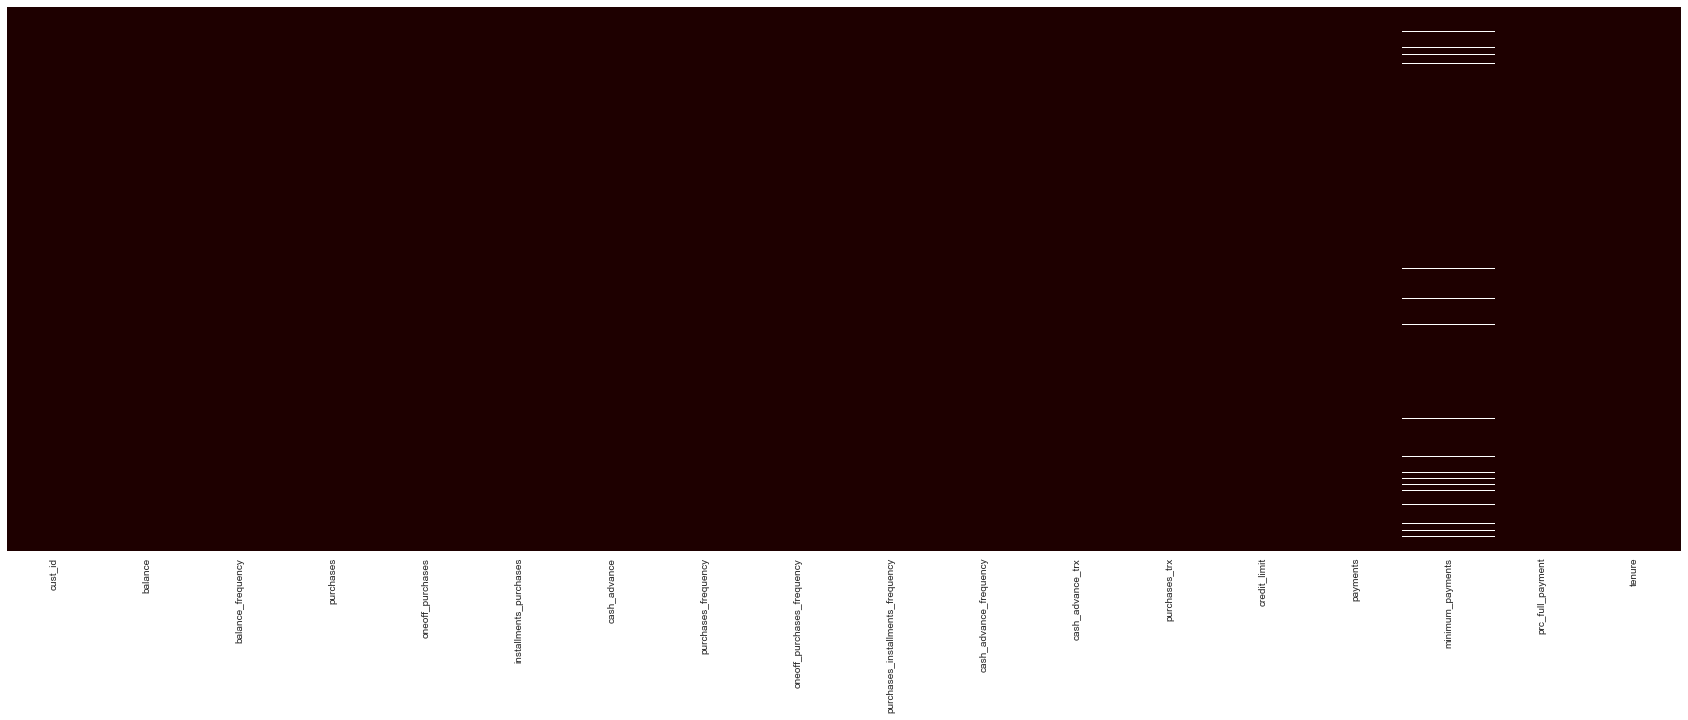

In [8]:
#We can get a rough idea of our missing Data using a heatmap
fig, ax = plot.subplots(figsize=(30,10)) 
sea.heatmap(data1.isnull(),yticklabels = False,cbar = False, cmap = "pink",linecolor = "Black")

In [9]:
data1.minimum_payments.describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: minimum_payments, dtype: float64

In [10]:
IQR = data1.minimum_payments.quantile(0.75) - data1.minimum_payments.quantile(0.25)
UL = data1.minimum_payments.quantile(0.75) + (1.5 * IQR)
LL = data1.minimum_payments.quantile(0.25) - (1.5 * IQR)

In [11]:
data1 = data1[data1.minimum_payments >= LL]
data1 = data1[data1.minimum_payments <= UL]

In [12]:
data1.shape

(7796, 18)

In [13]:
data1.minimum_payments.describe()

count    7796.000000
mean      441.951518
std       406.959078
min         0.019163
25%       163.447863
50%       260.304996
75%       615.940711
max      1809.974326
Name: minimum_payments, dtype: float64

In [14]:
data1["minimum_payments"].fillna(data1.minimum_payments.mean(), inplace=True)

In [15]:
data1["credit_limit"].fillna(data1.credit_limit.mean(), inplace=True)

In [16]:
data1.isnull().sum()

cust_id                             0
balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

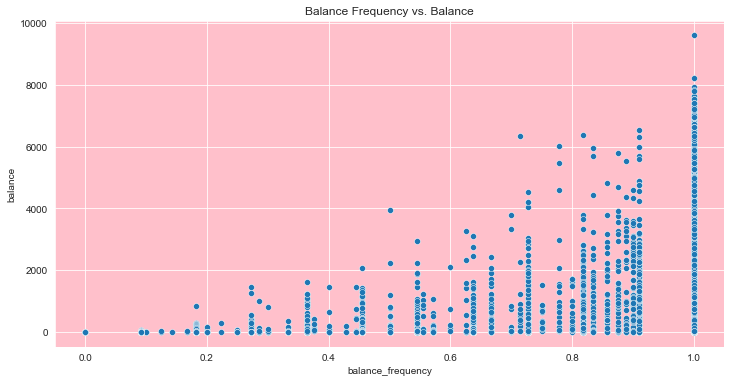

In [17]:
plot.figure(figsize=(12,6))
ax = plot.axes() 
ax.set_facecolor('pink') 
graph = sea.scatterplot(x='balance_frequency', y='balance', data=data1)
graph.set_title('Balance Frequency vs. Balance')
plot.show()

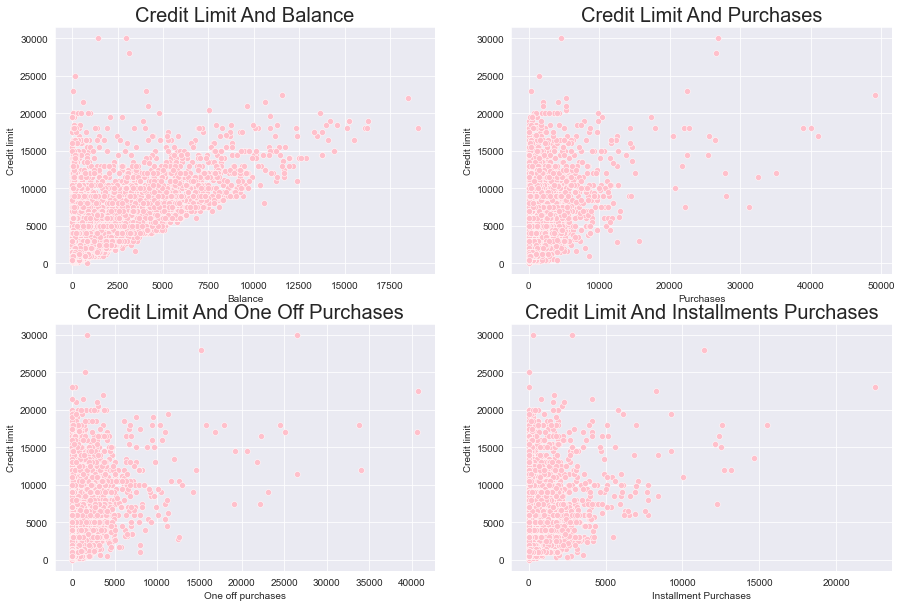

In [18]:
plot.rcParams['figure.figsize'] = (15,10)

plot.subplot(2,2,2)
sea.scatterplot(df['PURCHASES'],df['CREDIT_LIMIT'], color='pink')
plot.title('Credit Limit And Purchases', fontsize =20)
plot.xlabel('Purchases')
plot.ylabel('Credit limit')

plot.subplot(2,2,1)
sea.scatterplot(df['BALANCE'],df['CREDIT_LIMIT'], color='pink')
plot.title('Credit Limit And Balance', fontsize =20)
plot.xlabel('Balance')
plot.ylabel('Credit limit')

plot.subplot(2,2,3)
sea.scatterplot(df['ONEOFF_PURCHASES'],df['CREDIT_LIMIT'], color='pink')
plot.title('Credit Limit And One Off Purchases', fontsize =20)
plot.xlabel('One off purchases')
plot.ylabel('Credit limit')

plot.subplot(2,2,4)
sea.scatterplot(df['INSTALLMENTS_PURCHASES'],df['CREDIT_LIMIT'], color='pink')
plot.title('Credit Limit And Installments Purchases', fontsize =20)
plot.xlabel('Installment Purchases')
plot.ylabel('Credit limit')

plot.savefig('creditlimie_scatter.png')

Above is the scatter plot between credit limit vs balance and different types of purchase

Starting with different purchase types. These are interesting scatter plots since, intuitively, we would expect purchases to go up when the credit limit goes up. Afterall why get a credit card with high limit if you are not planning on using it but the graphs shows a different story. There seems to be no strong correlation between the credit limit and these variables. In fact, purchases amount tend to stay at zero while credit limit increases. This again, shows that credit cards users really do want to keep their balance low to utilized their credit. This might signify that, for most people, credit cards are tools for credit utilization rather than spending device.

As for balance, there seems to be a better correlation that as credit limit goes up balance also goes up but it is also clear to see that there are also points where balance stays at zeros but credit limits do go up.

# EDA

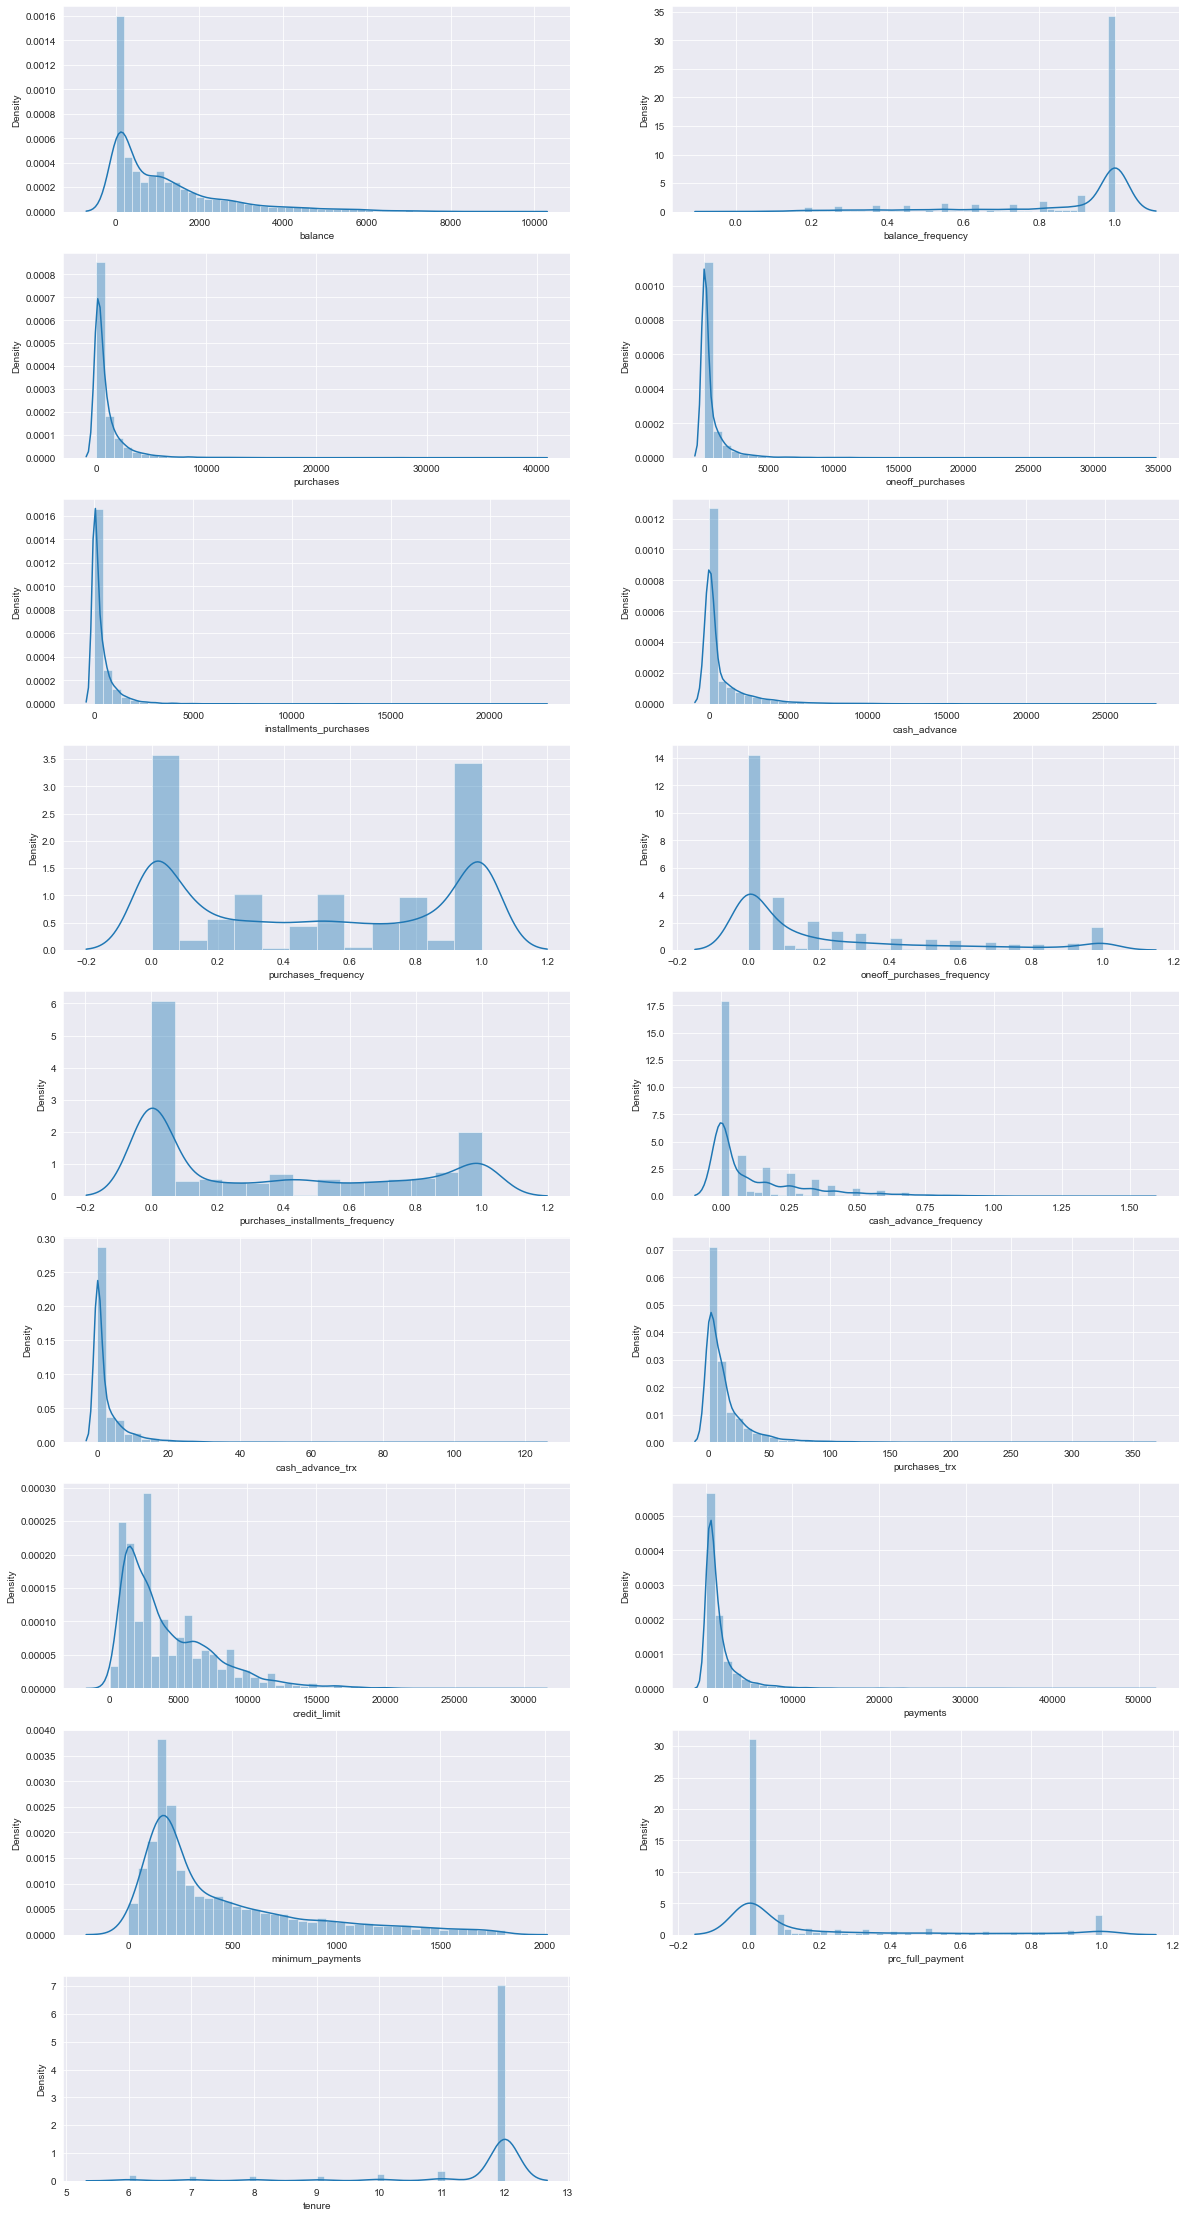

In [19]:
data1.drop(columns='cust_id', inplace=True)
#we are dropping customer id coloumn because we know that it just reprsent the unique customer id.import warnings
warnings.filterwarnings('ignore')

plot.rcParams['figure.figsize'] =(20,40)

for num in range(0,17):
    ax = plot.subplot(9,2,num+1)
    col = data1.columns[num]
    sea.distplot(data1[col], ax=ax)
    
plot.savefig('all_dist.png')

Above are the distribution plots of every variables in the dataframe

Here we have the overview of the whole distribution of the dataframe. We can see right away that these distributions are very left skewed and there are a lot of zero values. Let's explore the data furthur.

Text(0.5, 0, 'Balance')

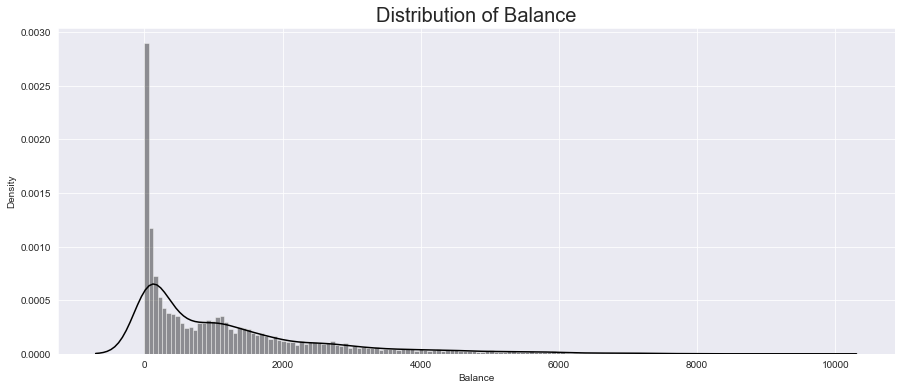

In [20]:
plot.rcParams['figure.figsize'] = (15,6)

sea.distplot(data1['balance'],bins=150, color='black')
plot.title('Distribution of Balance', size=20)
plot.xlabel('Balance')

Above we have the distribution plot of the balance

Let's take a closer look at some variables in the dataset starting with balance. The distribution of balance (total amount of money that you owe to your credit card company) range from 0 to 20,000 dollars. The interesting thing is that there seems to be a very high number of credit card with 0 balance. This could be due because people are holding what is called "zero balance cards". The basic idea is that by keeping you balance low (in this case zero) but your credit limit high, this would increase your credit utilization ratio and in turn increases your credit score

Text(0.5, 0, 'Purchases')

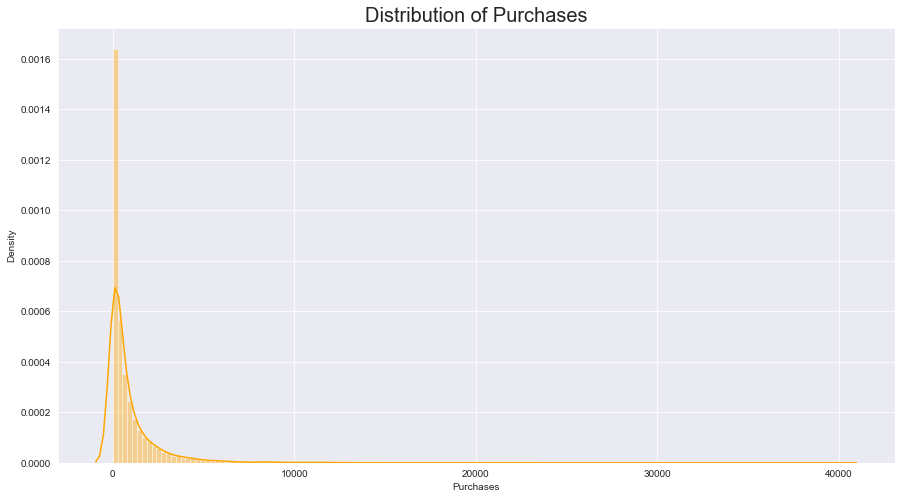

In [21]:
plot.rcParams['figure.figsize'] = (15,8)

sea.distplot(data1['purchases'], color='orange', bins=150)
plot.title('Distribution of Purchases', size=20)
plot.xlabel('Purchases')

Here we have the distribution plot of purchases

A lot of people have the purchse amounts of 0 which make sense since earlier we also see that alot of people are holding zero balance cards.

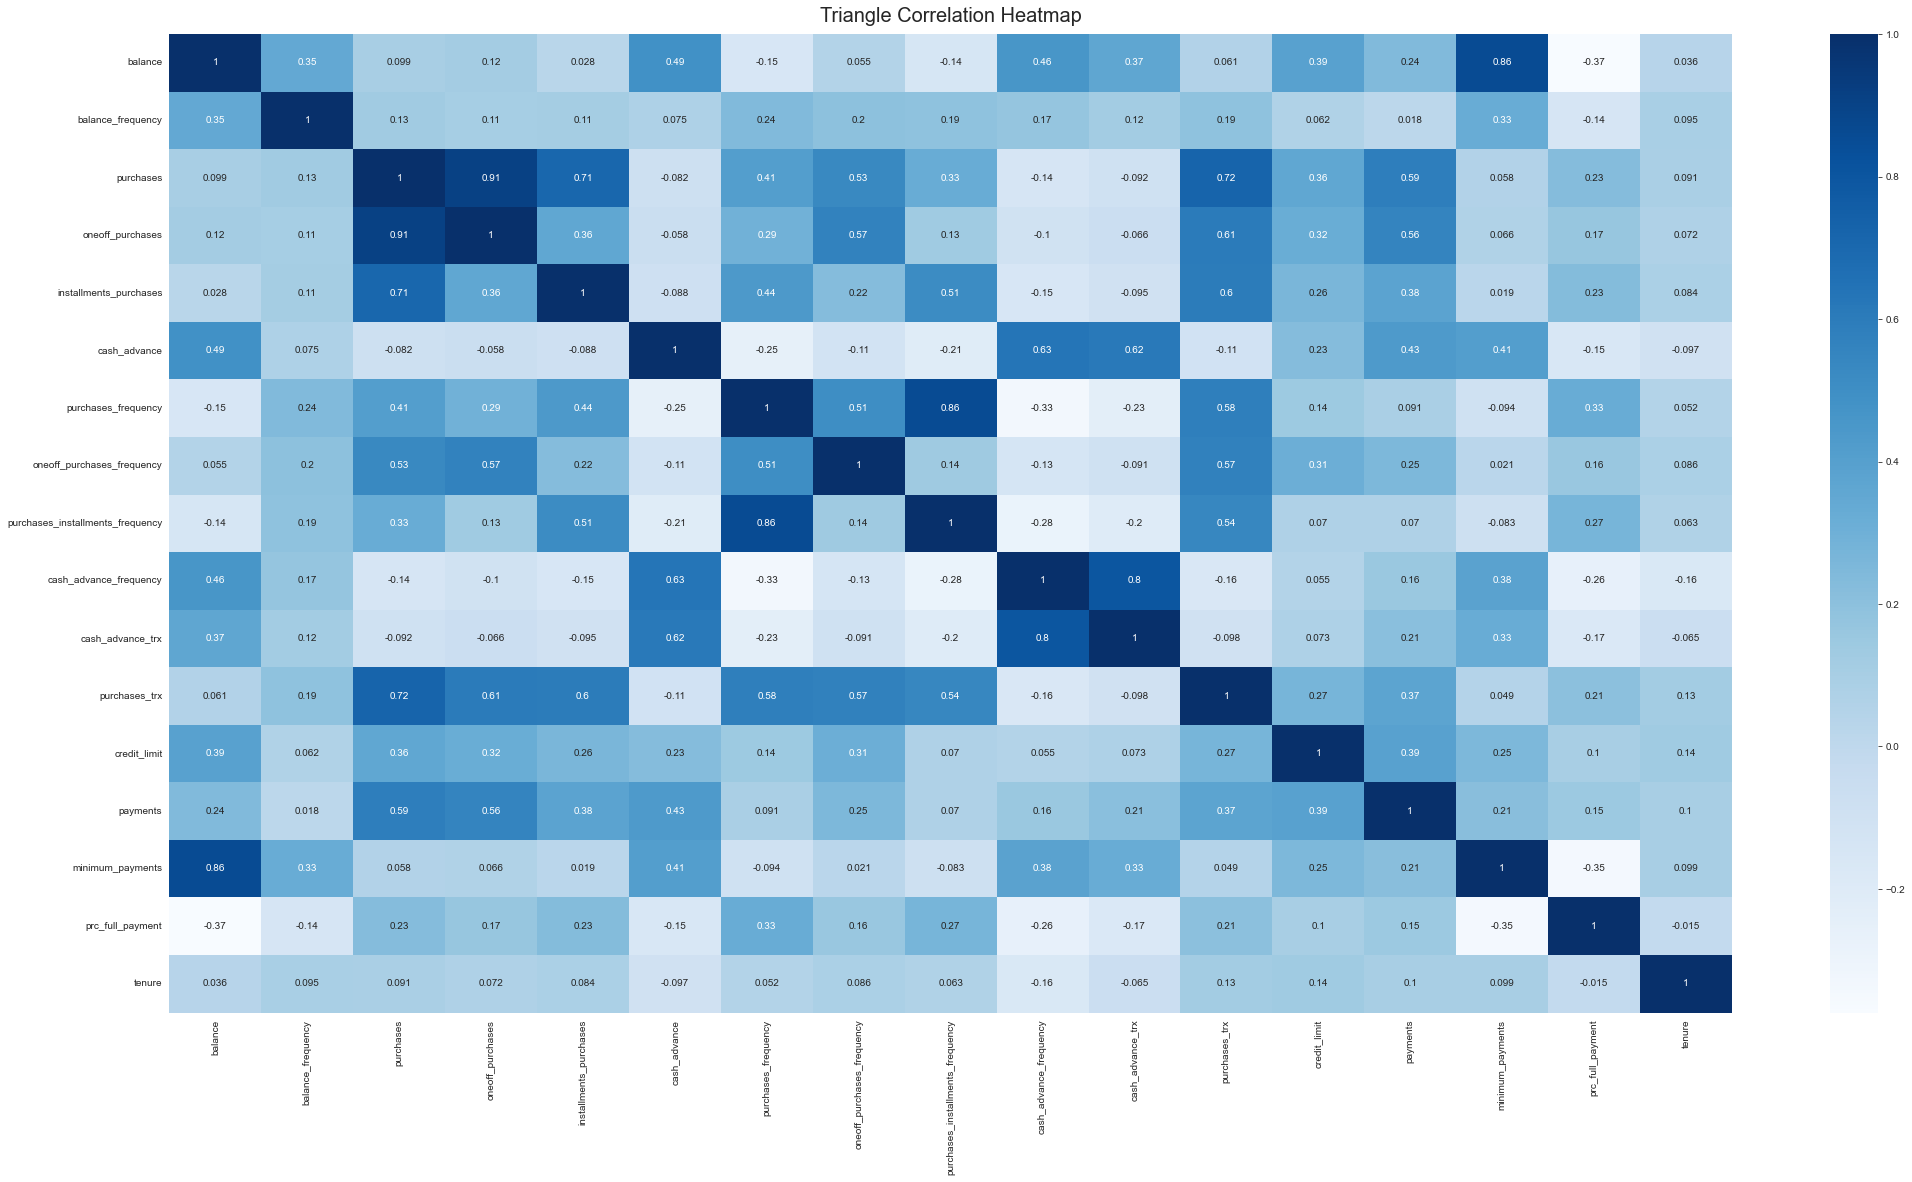

In [22]:
plot.figure(figsize=(35, 18))
heatmap = sea.heatmap(data1.corr(), annot=True, cmap="Blues")
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':20}, pad=12);


In [23]:
o_cols = data1.select_dtypes(include=['object']).columns.tolist()
num_cols = data1.select_dtypes(exclude=['object']).columns.tolist()

In [24]:
num_cols

['balance',
 'balance_frequency',
 'purchases',
 'oneoff_purchases',
 'installments_purchases',
 'cash_advance',
 'purchases_frequency',
 'oneoff_purchases_frequency',
 'purchases_installments_frequency',
 'cash_advance_frequency',
 'cash_advance_trx',
 'purchases_trx',
 'credit_limit',
 'payments',
 'minimum_payments',
 'prc_full_payment',
 'tenure']

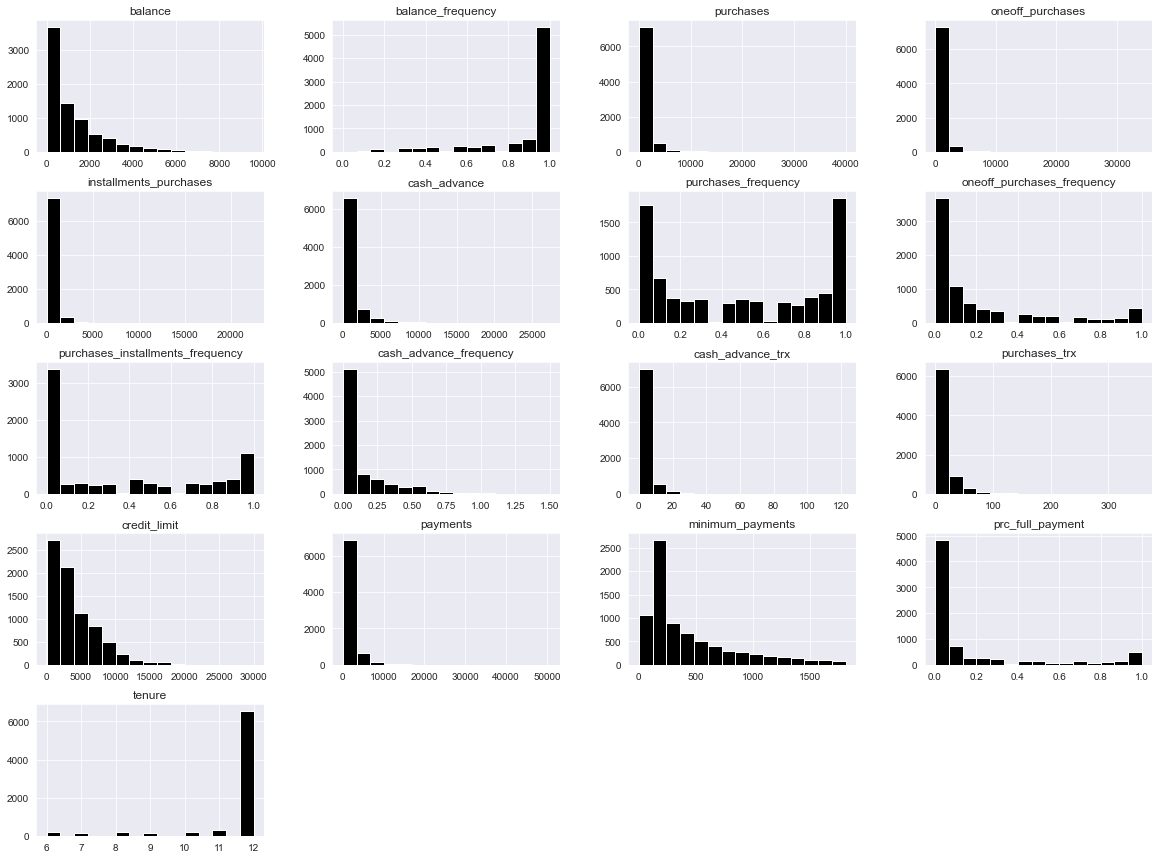

In [25]:
data1[num_cols].hist(bins=15, figsize=(20, 15), layout=(5, 4), color='black');


#  DATA MINING

In [26]:
data1.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.00,0,64,13500.0,6354.314328,198.065894,1.000000,12


In [27]:
datac=data1.copy()

In [28]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(datac.values)

In [29]:
data_scaled

array([[-0.82434207, -0.31033032, -0.45208833, ..., -0.74322247,
        -0.56750314,  0.36695284],
       [ 1.41586346,  0.11156231, -0.50289842, ...,  1.54912169,
         0.15751655,  0.36695284],
       [ 0.91467557,  0.53345493, -0.09110766, ...,  0.4554393 ,
        -0.56750314,  0.36695284],
       ...,
       [-0.8367436 , -0.2400172 , -0.4259909 , ..., -0.88351933,
         0.24814483, -4.06834068],
       [-0.84378761, -0.2400172 , -0.50289842, ..., -0.94904054,
         0.24814483, -4.06834068],
       [-0.58923186, -1.0134847 ,  0.07936713, ..., -0.8690929 ,
        -0.56750314, -4.06834068]])

In [30]:
datascale=pan.DataFrame(data_scaled, index=datac.index, columns=datac.columns)

In [31]:
datascale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7796 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance                           7796 non-null   float64
 1   balance_frequency                 7796 non-null   float64
 2   purchases                         7796 non-null   float64
 3   oneoff_purchases                  7796 non-null   float64
 4   installments_purchases            7796 non-null   float64
 5   cash_advance                      7796 non-null   float64
 6   purchases_frequency               7796 non-null   float64
 7   oneoff_purchases_frequency        7796 non-null   float64
 8   purchases_installments_frequency  7796 non-null   float64
 9   cash_advance_frequency            7796 non-null   float64
 10  cash_advance_trx                  7796 non-null   float64
 11  purchases_trx                     7796 non-null   float64
 12  credit

In [32]:
datascale.reset_index()

,index,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,0,-0.824342,-0.310330,-0.452088,-0.397287,-0.347651,-0.465997,-0.818981,-0.687166,-0.709195,-0.656047,-0.462654,-0.530695,-0.954867,-0.551420,-0.743222,-0.567503,0.366953
1,1,1.415863,0.111562,-0.502898,-0.397287,-0.463836,3.149016,-1.236299,-0.687166,-0.920580,0.645377,0.180680,-0.618551,0.810293,0.986866,1.549122,0.157517,0.366953
2,2,0.914676,0.533455,-0.091108,0.147622,-0.463836,-0.465997,1.267602,2.634694,-0.920580,-0.656047,-0.462654,-0.091417,0.957390,-0.385707,0.455439,-0.567503,0.366953
3,4,-0.273912,0.533455,-0.494377,-0.386011,-0.463836,-0.465997,-1.027641,-0.410345,-0.920580,-0.656047,-0.462654,-0.574623,-0.896028,-0.363520,-0.484503,-0.567503,0.366953
4,6,-0.408862,0.533455,3.273777,4.115109,0.374521,-0.465997,1.267602,2.634694,1.616054,-0.656047,-0.462654,2.192830,2.722550,1.874564,-0.599326,2.695089,0.366953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7791,8943,-0.849163,-1.786957,-0.491767,-0.382557,-0.463836,-0.465997,-0.818981,-0.133521,-0.920580,-0.656047,-0.462654,-0.574623,-1.101964,-0.607868,-0.979222,-0.567503,-4.068341
7792,8945,-0.833134,0.533455,-0.347848,-0.397287,-0.109289,-0.465997,1.267602,-0.687166,1.193281,-0.656047,-0.462654,-0.354984,-0.954867,-0.502608,-0.965921,1.063793,-4.068341
7793,8947,-0.836744,-0.240017,-0.425991,-0.397287,-0.287975,-0.465997,0.850285,-0.687166,0.770510,-0.656047,-0.462654,-0.398912,-0.954867,-0.598947,-0.883519,0.248145,-4.068341
7794,8948,-0.843788,-0.240017,-0.502898,-0.397287,-0.463836,-0.445485,-1.236299,-0.687166,-0.920580,0.211571,-0.140987,-0.618551,-1.101964,-0.610272,-0.949041,0.248145,-4.068341


# PCA 

In [33]:
pca=PCA().fit(datascale)
pca_df=pca.transform(datascale)

In [34]:
pca.explained_variance_ratio_

array([2.79986613e-01, 2.18093132e-01, 9.29981125e-02, 7.93313930e-02,
       6.06698132e-02, 5.15997352e-02, 4.98788118e-02, 3.64943431e-02,
       3.20281536e-02, 2.90104736e-02, 2.15593102e-02, 1.61878300e-02,
       1.25158060e-02, 1.07064472e-02, 6.36848165e-03, 2.57052172e-03,
       1.02277830e-06])

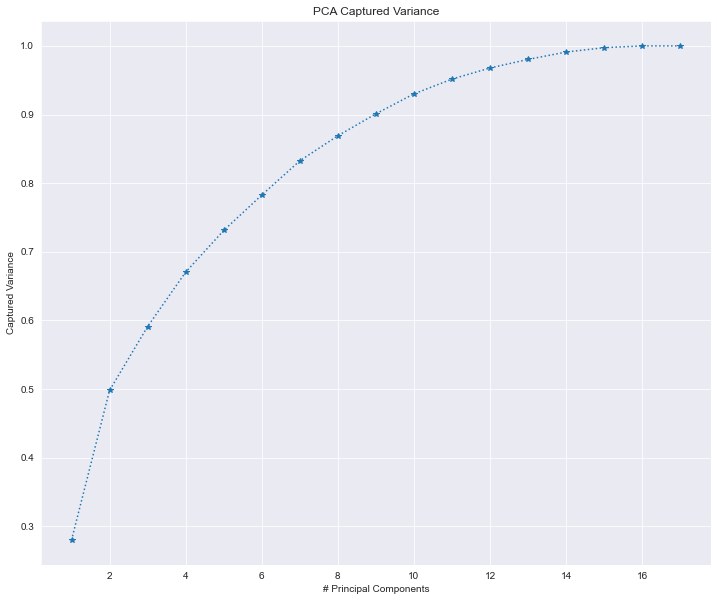

In [35]:
plot.figure(figsize=(12,10))
plot.plot(range(1, 18), pca.explained_variance_ratio_.cumsum(), marker='*', linestyle='dotted', )
plot.title('PCA Captured Variance')
plot.xlabel('# Principal Components')
plot.ylabel('Captured Variance')
plot.show()

We got a considerable number of components, and like our KMeans algorirthm, no crystalized cutoff. We can try setting the bar at 80% variance and keep 7 of the components to keep from our analysis here and continue.

In [36]:
#so now we'll run PCA again with our chosen number of principal components:
pca = PCA(n_components=7)
pca.fit(datascale)
PCA_dfc=pan.DataFrame(pca.transform(datascale), columns=(['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7']))
PCA_dfc.describe().T

,count,mean,std,min,25%,50%,75%,max
Component 1,7796.0,2.916543e-17,2.181830,-4.816847,-1.601770,-0.396315,0.907895,31.917429
Component 2,7796.0,2.916543e-17,1.925632,-2.932237,-1.366305,-0.453428,0.834252,14.894791
Component 3,7796.0,-2.187407e-17,1.257446,-3.070645,-0.814081,-0.140679,0.642185,13.686360
Component 4,7796.0,-1.458271e-17,1.161381,-6.018336,-0.839920,-0.138121,0.715461,9.092277
Component 5,7796.0,-2.187407e-17,1.015637,-7.385025,-0.503616,0.067443,0.635719,8.629862
Component 6,7796.0,-3.645678e-18,0.936647,-5.954910,-0.452617,-0.009095,0.437415,13.710144
Component 7,7796.0,-1.458271e-17,0.920896,-5.066437,-0.519207,0.144690,0.622352,9.696558


# Clustering 

Elbow Method

Elbow Method to determine the number of clusters to be formed:


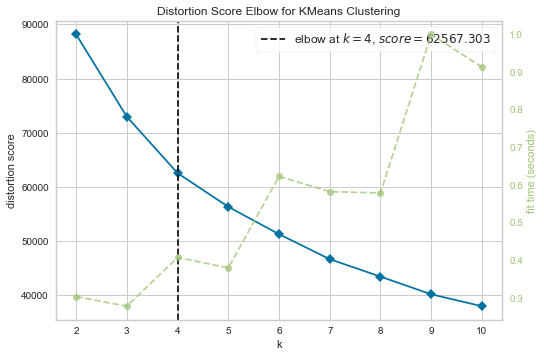

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
#Elbow method
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_dfc)
Elbow_M.show()

In [38]:
from sklearn.cluster import AgglomerativeClustering
#Initiating the Agglomerative Clustering model 
AgC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AgC = AgC.fit_predict(PCA_dfc)
PCA_dfc["Clusters"] = yhat_AgC
#Adding the Clusters feature to the orignal dataframe.
data1["Clusters"]= yhat_AgC

In [39]:
data1.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,Clusters
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,0
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.00,0,64,13500.0,6354.314328,198.065894,1.000000,12,1


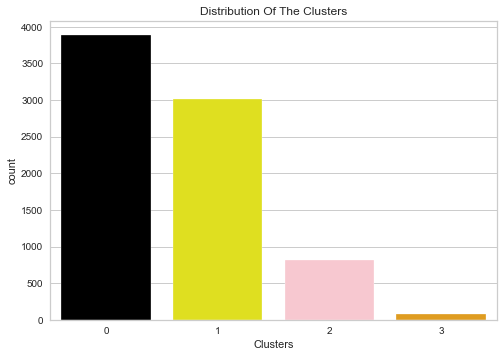

In [56]:
#Plotting countplot of clusters
pal = ["black","yellow", "pink","orange"]
plo = sea.countplot(x=data1["Clusters"], palette= pal)
plo.set_title("Distribution Of The Clusters")
plot.show()

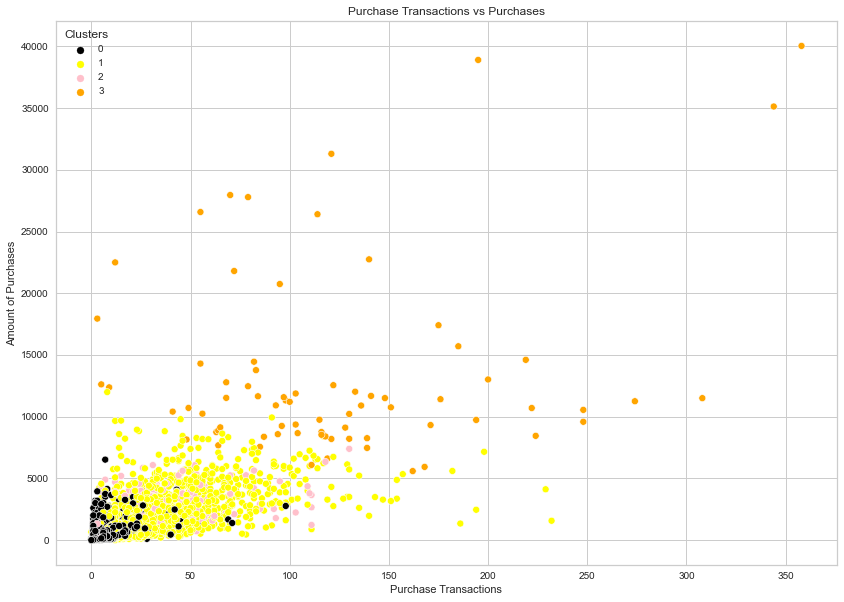

In [69]:
#now we can illustrate the groups based on a few features in a scatterplot
plot.figure(figsize=(14,10))
X = data1['purchases_trx']
Y = data1['purchases']
g = sea.scatterplot(X, Y, hue = data1['Clusters'], palette = ["black","yellow", "pink","orange"])
g.set_xlabel('Purchase Transactions')
g.set_ylabel('Amount of Purchases')
g.set_title('Purchase Transactions vs Purchases')
#plt.xlim([0, 15000])
#plt.ylim([0, 20000])
plot.show()

Here we can see that cluster 0 having less amount purchases as their purchases is less
there are more people in cluster 1 who are spending less amount on purchasing but with more transaction
and cluster 2 having less number of people with greater number of transaction but with less amount 
cluster 3 is with more purchases and with more amount of money than cluster 0 , cluster 1 and cluster2 

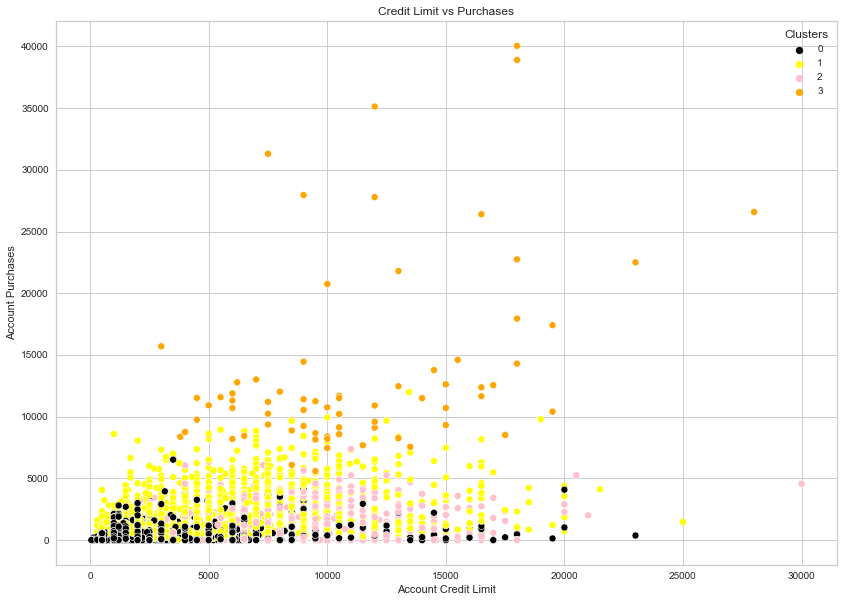

In [67]:
plot.figure(figsize=(14,10))
X = data1['credit_limit']
Y = data1['purchases']
g = sea.scatterplot(X, Y, hue = data1['Clusters'], palette = ["black","yellow", "pink","orange"])
g.set_xlabel('Account Credit Limit')
g.set_ylabel('Account Purchases')
g.set_title('Credit Limit vs Purchases')
#plt.xlim([0, 15000])
#plt.ylim([0, 20000])
plot.show()

cluster 0 belong to the people with less credit limit and less amount of purchases
more people belongs to cluster 1 and they are with more amount of transaction with medium credit limit
there are some people belong to cluster 2 who have more credit limit but not spending more amount on purchasing
very less people belong to the cluster 3 who are spending more amount than other with medium credit balance

In [ ]:
plot.figure(figsize=(10,8))
X = data1['balance']
Y = data1['purchases']
g = sea.scatterplot(X, Y, hue = data1['Clusters'], palette = ["black","yellow", "pink","orange"])
g.set_xlabel('Account Balance')
g.set_ylabel('Purchases from account')
g.set_title('Account Balance vs Purchases')
#plt.xlim([0, 15000])
#plt.ylim([0, 20000])
plot.show()

people in cluster 0 have very less account balance with less amount of purchases
in cluster 1 people spending more amount on purchases even they have same account balance as cluster 0 
cluster 2 are the people having high account balance but are not spending on purchasing
some people only belong to the cluster 3 who spends lots of amount on purchasing and also have decent account balance

# Conclusion


Cluster 0: cluster 0 belong to the people with less credit limit, less amount of purchases as they have very less account balance.

Cluster1 :There more people belongs to cluster 1 and they are with more number of transaction even when their account balance is same as cluster 0
also they have medium credit limit and spending less amount on purchasing.

Cluster2: cluster 2 having less number of people with greater number of transaction but with less amount 
more credit limit but not spending more amount on purchasing even with having high account balance

Cluster 3: cluster 3 is with more purchases and spends lots of money than cluster 0 , cluster 1 and cluster2 
They have medium credit balance but have high account balance.